In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

print(1)
# Load ResNet50 model without the top layer
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#The input shape is defined here to ensure the output shape is not dynamic
model.trainable = False

# Create a Sequential model and add the layers
# Define the input shape explicitly for the Sequential model
new_model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)), # Added input layer with shape
    model,
    GlobalMaxPooling2D()
])


# Display the model summary
print("Generating model summary...")
new_model.summary() # Use new_model to display the summary

1
Generating model summary...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [3]:
import numpy as np
from numpy.linalg import norm
def extract_features(img_path,model):
  img = image.load_img(img_path,target_size=(224,224))
  img_array = image.img_to_array(img)
  expanded_img_array = np.expand_dims(img_array,axis = 0)
  preprocessed_img = preprocess_input(expanded_img_array)
  result = model.predict(preprocessed_img).flatten()
  normalized_result = result / norm(result)
  return normalized_result

In [5]:
import os
boys_re = []
for file in os.listdir('boys/Boys_resized'):
  boys_re.append(os.path.join('boys/Boys_resized',file))
print(len(boys_re))
print(boys_re[0:5])

5438
['boys/Boys_resized/MEN-Tees_Tanks-id_00002249-02_7_additional.jpg', 'boys/Boys_resized/MEN-Sweatshirts_Hoodies-id_00002818-01_2_side.jpg', 'boys/Boys_resized/MEN-Tees_Tanks-id_00000345-02_2_side.jpg', 'boys/Boys_resized/MEN-Tees_Tanks-id_00001774-07_7_additional.jpg', 'boys/Boys_resized/MEN-Tees_Tanks-id_00001519-01_7_additional.jpg']


In [ ]:
# feature_list = []
# for file in boys_re:
#   feature_list.append(extract_features(file,model))
# print(np.array(feature_list).shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━

In [27]:
# import pickle
# pickle.dump(feature_list,open('embeddings.pkl','wb'))
# pickle.dump(boys_re,open('boys_re.pkl','wb'))

In [7]:
 import pickle
 feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
 boys_re = pickle.load(open('boys_re.pkl','rb'))

In [8]:
"""import pickle
import numpy as np

# Assuming feature_list is already created
feature_list = np.array(feature_list)

# Save feature_list to a file
with open('boys_feature_list.pkl', 'wb') as f:
    pickle.dump(feature_list, f)

print("Feature list saved successfully!")



# Next time directly use the feature_list file directly using boys_feature_list.pkl present in the boys folder.
#NOTE: First copy the boys_feature_list.pkl in the DSML dataset folder(main folder).
"""
import pickle

# Load feature_list from the file
with open('boys/boys_feature_list.pkl', 'rb') as f:
    feature_list = pickle.load(f)

print("Feature list loaded successfully!")
print(feature_list.shape)  # Verify the shape




Feature list loaded successfully!
(5437, 100352)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2043  881  308  775 4687 2727]]


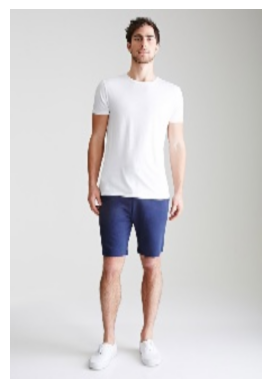

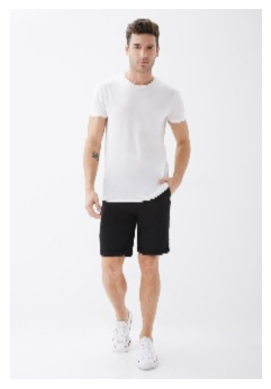

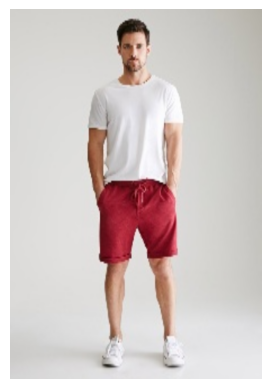

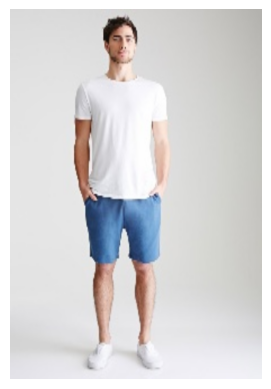

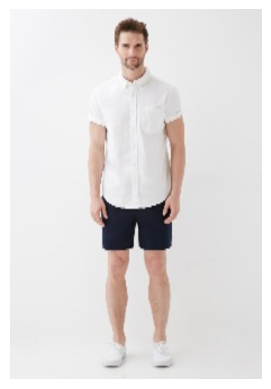

In [11]:
import pickle
from sklearn.neighbors import NearestNeighbors
import cv2
import matplotlib.pyplot as plt

# Function to display image using matplotlib
def display_image(image_path,size = None):
    img = cv2.imread(image_path)
    if size:
        img = cv2.resize(img,size)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Extract features and find nearest neighbors
samp1 = extract_features('boys/Boys_resized/MEN-Shorts-id_00004249-01_4_full.jpg', model)
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')
neighbors.fit(feature_list)

distances, indices = neighbors.kneighbors([samp1])
print(indices)

# Display the nearest images using matplotlib
for file in indices[0][1:6]:  # Displaying the nearest 5 images
    display_image(boys_re[file],(750,1101))
